# Importando pacotes necessários

In [27]:
from graph_tool.draw import graph_draw
from graph_tool.draw import draw_hierarchy
from graph_tool.draw import get_hierarchy_control_points
from graph_tool.inference import minimize_blockmodel_dl
from graph_tool.inference import minimize_nested_blockmodel_dl
from graph_tool import Graph
from graph_tool import topology
from graph_tool.draw import planar_layout
import graph_tool as gt
import pandas as pd
import seaborn as sns
import numpy as np
import unicodedata
import matplotlib.pyplot as plt
%matplotlib inline
import re
import unidecode

# Tratando os dados do IE - Unicamp

## Importando os dados

In [307]:
path = 'Data/savedrecs.txt'
# Arquivo separado por tabulação (\t) e codificado em utf-8
dadosie = pd.read_csv(path, sep='\t', encoding='utf-8')

## Tratando os dados

In [308]:
# Criando um DataFrame
df = pd.DataFrame(dadosie)
df

,PT,AU,BE,TI,X1,Y1,Z1,SO,LA,DT,...,EP,DI,EC,C2,SC,UT,OA,HC,HP,DA
J,"Braga Junior, Sergio; Martínez, Marta Pagán; C...",NaN,"Greenwashing effect, attitudes, and beliefs in...",NaN,NaN,NaN,RAUSP Management Journal,English,research-article,Marketing,...,10.1108/rausp-08-2018-0070,Business,SciELO Brazil,Business & Economics,SCIELO:S2531-04882019000200006,gold,NaN,NaN,NaN,NaN
J,"Rocha, Leonardo Andrade; Khan, Ahmad Saeed; Li...",NaN,"O ""efeito nefasto"" da corrupção no Brasil: ""qu...",The 'detrimental effect' of corruption in Braz...,NaN,NaN,Nova Economia,Portuguese,research-article,corruption; quantile regression; instrumental ...,...,10.1590/0103-6351/3695,Economics,SciELO Brazil,Business & Economics,SCIELO:S0103-63512019000100277,gold,NaN,NaN,NaN,NaN
J,"Prates, Daniela Magalhães",NaN,Apresentação,NaN,NaN,NaN,Economia e Sociedade,Portuguese,editorial,NaN,...,10.1590/1982-3533.2019v28n1art001,Economics; Sociology,SciELO Brazil,Business & Economics; Sociology,SCIELO:S0104-06182019000100001,gold,NaN,NaN,NaN,NaN
J,"Romeiro, Ademar Ribeiro",NaN,Evitar o colapso ambiental requer o fim do cap...,NaN,NaN,NaN,Economia e Sociedade,Portuguese,book-review,NaN,...,10.1590/1982-3533.2019v28n1art13,Economics; Sociology,SciELO Brazil,Business & Economics; Sociology,SCIELO:S0104-06182019000100014,gold,NaN,NaN,NaN,NaN
J,"Ramos Júnior, Flavio Paulino; Santos, Isabela ...",NaN,Capital structure of Brazilian public companie...,Estructura de capital de empresas brasileñas: ...,NaN,NaN,Contaduría y administración,English,research-article,Capital structure; Indebtedness; Corporate fin...,...,10.22201/fca.24488410e.2018.1152,"Business, Finance; Management",SciELO Mexico,Business & Economics,SCIELO:S0186-10422019000100002,gold,NaN,NaN,NaN,NaN
J,"Mello, Guilherme Santos",NaN,Análise crítica do papel das inovações finance...,The subprime crisis and the fourth dimension o...,NaN,NaN,Economia e Sociedade,Portuguese,research-article,Derivatives; Crisis; Subprime; Marx; Fourth di...,...,10.1590/1982-3533.2018v27n3art5,Economics; Sociology,SciELO Brazil,Business & Economics; Sociology,SCIELO:S0104-06182018000300825,gold,NaN,NaN,NaN,NaN
J,"Pozzer, Carlos Eduardo; Ferrão, André Munhoz d...",NaN,O Plano de Desenvolvimento do Lago de Furnas d...,El Plan de Desarrollo del Lago de Furnas 1975:...,The Development Plan of Furnas Lake of 1975: t...,Le Plan de Développement du Lac Furnas de 1975...,Interações (Campo Grande),Portuguese,research-article,Furnas Lake; Tennessee Valley Authority; Minas...,...,10.20435/inter.v19i4.1688,Business; Planning & Development,SciELO Brazil,Business & Economics; Public Administration,SCIELO:S1518-70122018000400871,gold,NaN,NaN,NaN,NaN
J,"Batista, Alexandre Ricardo de Aragão; Maia, Ux...",NaN,Stock market under the 2016 Brazilian presiden...,Mercado acionário sob o impeachment presidenci...,NaN,NaN,Revista Contabilidade & Finanças,English,research-article,study of events; market efficiency; informatio...,...,10.1590/1808-057x201805560,"Business, Finance",SciELO Brazil,Business & Economics,SCIELO:S1519-70772018000300405,gold,NaN,NaN,NaN,NaN
J,"MAIA, ALEXANDRE GORI; SAKAMOTO, ARTHUR",NaN,Does wage reflect labor productivity? A compar...,NaN,NaN,NaN,Brazilian Journal of Political Economy,English,research-article,Labor market; occupational structure; inequali...,...,10.1590/0101-35172018-2764,Economics; Political Science,SciELO Brazil,Business & Economics; Government & Law,SCIELO:S0101-31572018000400629,gold,NaN,NaN,NaN,NaN
J,"Blikstad, Nicholas Magnus Deleuse; Oliveira, G...",NaN,Instabilidade financeira na Eurozona e a crise...,Financial instability in the Eurozone and the ...,NaN,NaN,Economia e Sociedade,Portuguese,research-article,PIIGS crisis; Financial instability; Euro; Eur...,...,10.1590/1982-3533.2017v27n2art3,Economics; Sociology,SciELO Brazil,Business & Economics; Sociology,SCIELO:S0104-06182018000200431,gold,NaN,NaN,NaN,NaN


In [309]:
# Criando um index numérico crescente
idx = range(0,len(df))
df['ID'] = idx
df = df.set_index('ID')

In [310]:
# Retirando valores nulos (NaN)
df = df.dropna(axis=1, how='all')

In [311]:
df.iloc[1]

PT    Rocha, Leonardo Andrade; Khan, Ahmad Saeed; Li...
BE    O "efeito nefasto" da corrupção no Brasil: "qu...
TI    The 'detrimental effect' of corruption in Braz...
X1                                                  NaN
Y1                                                  NaN
Z1                                        Nova Economia
SO                                           Portuguese
LA                                     research-article
DT    corruption; quantile regression; instrumental ...
DE                                                  NaN
X5    corrupção; regressão quantílica; variáveis ins...
Y5                                                  NaN
Z5    Abstract This study analyzes the impact of cor...
AB                                                  NaN
X4    Resumo O presente estudo analisa o impacto da ...
Y4                                                  NaN
Z4    [Poz, Maria Ester Soares Dal] Universidade Est...
EM                                              

In [312]:
# Extraindo as colunas relevantes
df = df.iloc[:,[0,1,5,16,25,30]]

In [313]:
df

,PT,BE,Z1,Z4,U2,PD
ID,,,,,,
0,"Braga Junior, Sergio; Martínez, Marta Pagán; C...","Greenwashing effect, attitudes, and beliefs in...",RAUSP Management Journal,"[Correa, Caroline Miranda] Universidade Estadu...",Universidade de São Paulo,2019
1,"Rocha, Leonardo Andrade; Khan, Ahmad Saeed; Li...","O ""efeito nefasto"" da corrupção no Brasil: ""qu...",Nova Economia,"[Poz, Maria Ester Soares Dal] Universidade Est...",Nova Economia,2019
2,"Prates, Daniela Magalhães",Apresentação,Economia e Sociedade,"[Prates, Daniela Magalhães] revista Economia e...",Instituto de Economia da Universidade Estadual...,2019
3,"Romeiro, Ademar Ribeiro",Evitar o colapso ambiental requer o fim do cap...,Economia e Sociedade,"[Romeiro, Ademar Ribeiro] Universidade Estadua...",Instituto de Economia da Universidade Estadual...,2019
4,"Ramos Júnior, Flavio Paulino; Santos, Isabela ...",Capital structure of Brazilian public companie...,Contaduría y administración,"[Gaio, Luiz Eduardo] Universidade Estadual de ...","Facultad de Contaduría y Administración, UNAM",2019
5,"Mello, Guilherme Santos",Análise crítica do papel das inovações finance...,Economia e Sociedade,"[Mello, Guilherme Santos] Universidade Estadua...",Instituto de Economia da Universidade Estadual...,2018
6,"Pozzer, Carlos Eduardo; Ferrão, André Munhoz d...",O Plano de Desenvolvimento do Lago de Furnas d...,Interações (Campo Grande),"[Ferrão, André Munhoz de Argollo] Universidade...",Universidade Católica Dom Bosco,2018
7,"Batista, Alexandre Ricardo de Aragão; Maia, Ux...",Stock market under the 2016 Brazilian presiden...,Revista Contabilidade & Finanças,"[Maia, Uxi] Universidade Federal de Santa Mari...","Universidade de São Paulo, Faculdade de Econom...",2018
8,"MAIA, ALEXANDRE GORI; SAKAMOTO, ARTHUR",Does wage reflect labor productivity? A compar...,Brazilian Journal of Political Economy,"[SAKAMOTO, ARTHUR] Texas A&M University, USA; ...",Editora 34,2018


In [314]:
# Nomeando as colunas
df.columns = ['autorcomacento','título','revista','universidade','localrevista','ano']

In [315]:
df

NameError: name 'dfb' is not defined

In [316]:
df['universidade'][230]

'[Pereira, Pedro Luiz Valls] IBMEC Business School; [Santos Filho, Otaviano Canuto dos] Universidade Estadual de Campinas, Brazil; [Marçal, Emerson Fernandes] Universidade de São Paulo, Brazil'

In [317]:
# Coluna possível para associar pesquisadores com universidade
listadeuniversidades = []
for i in range(len(df)):
    try:
        listadeuniversidades.append(df['universidade'][i].split('; ')[0].split('[')[1].split('] ')[1])
    except:
        listadeuniversidades.append(str(i))

In [318]:
listadeuniversidades
listadeuniversidades = np.array(listadeuniversidades)
listadeuniversidades = np.unique(listadeuniversidades)
listadeuniversidades = list(listadeuniversidades)

In [319]:
listadeuniversidades

['109',
 '110',
 '120',
 '13',
 '130',
 '137',
 '166',
 '17',
 '173',
 '176',
 '178',
 '183',
 '201',
 '202',
 '23',
 '33',
 '39',
 '46',
 '59',
 '77',
 '88',
 'Banco Interamericano de Desenvolvimento, USA',
 'Centro Universitário FEI, Brazil',
 'Centro Universitário da Fundação Educacional Inaciana “Padre Sabóia de Medeiros”, Brazil',
 'Câmara Municipal de Diadema, Brasil',
 'Escola Superior de Propaganda e Marketing, Brazil',
 'Faculdades Alfa, Brasil',
 'Faculdades SPEI, Brasil',
 'Fundação Getúlio Vargas, Brazil',
 'Grupo de Estudos em Economia Industrial, Brazil',
 'Grupo de Pesquisa e Documentação sobre o Empresariamento da Saúde Henry Jouval Jr, Brasil',
 'IBMEC Business School',
 'Instituto Agronômico do Paraná, Brazil',
 'Instituto de Filosofia e Ciências Humanas',
 'Instituto de Pesquisa Econômica Aplicada, Brasil',
 'Instituto do Direito Púbico (IDP), Brazil',
 'Ministério da Ciência, Tecnologia e Inovação, Brazil',
 'Pontifícia Universidade Católica de Campinas, Brazil',
 '

In [320]:
# Criando um dicionário para associar as revistas a um número específico (ID)
revistaid = {}

for i in range(len(df['revista'].unique())):
    k = df['revista'].unique()[i]
    v = i+1
    revistaid[k] = v

revistaid

{'RAUSP Management Journal': 1,
 'Nova Economia': 2,
 'Economia e Sociedade': 3,
 'Contaduría y administración': 4,
 'Interações (Campo Grande)': 5,
 'Revista Contabilidade & Finanças': 6,
 'Brazilian Journal of Political Economy': 7,
 'BBR. Brazilian Business Review': 8,
 'Revista de Administração Contemporânea': 9,
 'Revista de Economia Contemporânea': 10,
 'Revista de Administração (São Paulo)': 11,
 'Revista de Gestão dos Países de Língua Portuguesa': 12,
 'América Latina en la historia económica': 13,
 'Revista de Administração de Empresas': 14,
 'Revista de Economia Política': 15,
 'Estudos Econômicos (São Paulo)': 16,
 'REAd. Revista Eletrônica de Administração (Porto Alegre)': 17,
 'RAM. Revista de Administração Mackenzie': 18,
 'BAR - Brazilian Administration Review': 19,
 'Revista de Administração Pública': 20,
 'Revista Brasileira de Economia': 21,
 'Pensamiento & Gestión': 22,
 'El trimestre económico': 23,
 'Revista Portuguesa e Brasileira de Gestão': 24,
 'Revista Brasile

In [321]:
# Criando a coluna 'revistaid' a partir do dicionário
for i in range(len(df)):
    for k,v in revistaid.items():
        if (df['revista'][i] == k):
            df.loc[i,'revistaid'] = int(v)
    


In [322]:
# Retirando acentuação dos nomes dos autores
nomes = []

for i in range(len(df)):
    nomes.append(unidecode.unidecode(df['autorcomacento'][i]).title())
    
del df['autorcomacento']

df['autores'] = nomes

In [323]:
# Identificando o número máximo de coautores
listadeautores = df['autores'].str.split('; ')
numerodecoautores = []
for i in range(len(df)):
    numerodecoautores.append(len(listadeautores[i]))
    
# Número máximo de coautores    
max(numerodecoautores) - 1

7

In [324]:
# Criando as colunas de autor e respectivos coautores

## Criando as listas para os autores e coautores

autor = []
coautor1 = []
coautor2 = []
coautor3 = []
coautor4 = []
coautor5 = []
coautor6 = []
coautor7 = []


## Adicionando os autores às listas
for i in range(len(df)):
    # Lista de autores
    autor.append(df['autores'][i].split('; ')[0])

## Adicionando os coautores às listas
## É utilizado try no for loop porque o index da lista dá erro caso não exista
for i in range(len(df)):
    # Primeira lista de coautores
    try:
        coautor1.append(df['autores'][i].split('; ')[1])
    except IndexError:
        coautor1.append('')
        
 
for i in range(len(df)):
    # Terceira lista de coautores
    try:
        coautor2.append(df['autores'][i].split('; ')[2])
    except IndexError:
        coautor2.append('')
      
for i in range(len(df)):
    # Quarta lista de coautores
    try:
        coautor3.append(df['autores'][i].split('; ')[3])
    except IndexError:
        coautor3.append('')
        
for i in range(len(df)):
    # Quarta lista de coautores
    try:
        coautor4.append(df['autores'][i].split('; ')[4])
    except IndexError:
        coautor4.append('')

for i in range(len(df)):
    # Quarta lista de coautores
    try:
        coautor5.append(df['autores'][i].split('; ')[5])
    except IndexError:
        coautor5.append('')
        
for i in range(len(df)):
    # Quarta lista de coautores
    try:
        coautor6.append(df['autores'][i].split('; ')[6])
    except IndexError:
        coautor6.append('')
        
for i in range(len(df)):
    # Quarta lista de coautores
    try:
        coautor7.append(df['autores'][i].split('; ')[7])
    except IndexError:
        coautor7.append('')
        
## Adicionando as listas às colunas respectivas dos coautores
df['autor'] = autor
df['coautor1'] = coautor1
df['coautor2'] = coautor2
df['coautor3'] = coautor3
df['coautor4'] = coautor4
df['coautor5'] = coautor5
df['coautor6'] = coautor6
df['coautor7'] = coautor7


In [325]:
# Verificando o DataFrame
df

,título,revista,universidade,localrevista,ano,revistaid,autores,autor,coautor1,coautor2,coautor3,coautor4,coautor5,coautor6,coautor7
ID,,,,,,,,,,,,,,,
0,"Greenwashing effect, attitudes, and beliefs in...",RAUSP Management Journal,"[Correa, Caroline Miranda] Universidade Estadu...",Universidade de São Paulo,2019,1.0,"Braga Junior, Sergio; Martinez, Marta Pagan; C...","Braga Junior, Sergio","Martinez, Marta Pagan","Correa, Caroline Miranda","Moura-Leite, Rosamaria Cox","Da Silva, Dirceu",,,
1,"O ""efeito nefasto"" da corrupção no Brasil: ""qu...",Nova Economia,"[Poz, Maria Ester Soares Dal] Universidade Est...",Nova Economia,2019,2.0,"Rocha, Leonardo Andrade; Khan, Ahmad Saeed; Li...","Rocha, Leonardo Andrade","Khan, Ahmad Saeed","Lima, Patricia Veronica Pinheiro Sales","Poz, Maria Ester Soares Dal","Oliveira, Fernando Porfirio Soares De",,,
2,Apresentação,Economia e Sociedade,"[Prates, Daniela Magalhães] revista Economia e...",Instituto de Economia da Universidade Estadual...,2019,3.0,"Prates, Daniela Magalhaes","Prates, Daniela Magalhaes",,,,,,,
3,Evitar o colapso ambiental requer o fim do cap...,Economia e Sociedade,"[Romeiro, Ademar Ribeiro] Universidade Estadua...",Instituto de Economia da Universidade Estadual...,2019,3.0,"Romeiro, Ademar Ribeiro","Romeiro, Ademar Ribeiro",,,,,,,
4,Capital structure of Brazilian public companie...,Contaduría y administración,"[Gaio, Luiz Eduardo] Universidade Estadual de ...","Facultad de Contaduría y Administración, UNAM",2019,4.0,"Ramos Junior, Flavio Paulino; Santos, Isabela ...","Ramos Junior, Flavio Paulino","Santos, Isabela Dos","Gaio, Luiz Eduardo","Stefanelli, Nelson Oliveira","Passos, Ivan Carlin",,,
5,Análise crítica do papel das inovações finance...,Economia e Sociedade,"[Mello, Guilherme Santos] Universidade Estadua...",Instituto de Economia da Universidade Estadual...,2018,3.0,"Mello, Guilherme Santos","Mello, Guilherme Santos",,,,,,,
6,O Plano de Desenvolvimento do Lago de Furnas d...,Interações (Campo Grande),"[Ferrão, André Munhoz de Argollo] Universidade...",Universidade Católica Dom Bosco,2018,5.0,"Pozzer, Carlos Eduardo; Ferrao, Andre Munhoz D...","Pozzer, Carlos Eduardo","Ferrao, Andre Munhoz De Argollo",,,,,,
7,Stock market under the 2016 Brazilian presiden...,Revista Contabilidade & Finanças,"[Maia, Uxi] Universidade Federal de Santa Mari...","Universidade de São Paulo, Faculdade de Econom...",2018,6.0,"Batista, Alexandre Ricardo De Aragao; Maia, Ux...","Batista, Alexandre Ricardo De Aragao","Maia, Uxi","Romero, Alecio",,,,,
8,Does wage reflect labor productivity? A compar...,Brazilian Journal of Political Economy,"[SAKAMOTO, ARTHUR] Texas A&M University, USA; ...",Editora 34,2018,7.0,"Maia, Alexandre Gori; Sakamoto, Arthur","Maia, Alexandre Gori","Sakamoto, Arthur",,,,,,


In [326]:
# Verificando os diferentes valores da coluna 'coautor7'
df['coautor7'].unique()

array(['', 'Lima, Lucikelly Dos Santos'], dtype=object)

In [327]:
# Criando um DataFrame novo para guardar os nomes dos autores
autoresie = df.iloc[:,[0,1,3,6,7,8,9,10,11,12,13]]

In [328]:
# Criando uma lista com todos os nomes dos autores e coautores
autores = autor + coautor1 + coautor2 + coautor3 + coautor4 + coautor5 + coautor6 + coautor7 

In [329]:
# Código para pegar os valores únicos de uma lista
autores = np.array(autores)
autores = np.unique(autores)
autores = list(autores)

In [330]:
# Retirando o caso de coautor inexiste ('')
autores = autores[1:]

In [331]:
# Verificando a lista de autores e coautores
autores

['Abib, Gustavo',
 'Afonso, Jose Roberto',
 'Aggio, Gustavo De Oliveira',
 'Albuquerque, Eduardo Da Motta E',
 'Albuquerque, Marconi Edson Esmeraldo',
 'Alcadipani, Rafael',
 'Alcantara, Daniela P. R. De',
 'Alcantara, Wenersamy Ramos De',
 'Alderete, Veronica',
 'Alexandre, Michel',
 'Almeida, Carlos Alano Soares De',
 'Alves, Andre Cherubini',
 'Alves, Elia Elisa Cia',
 'Amitrano, Claudio Roberto',
 'Andrade, Daniel Caixeta',
 'Andrade, Rogerio P. De',
 'Andrade, Rogerio Pereira De',
 'Andrietta, Lucas Salvador',
 'Anunciacao, Pedro',
 'Arantes, Flavio',
 'Arruda, Jose Jobson De Andrade',
 'Assaf Neto, Alexandre',
 'Assis, Renato Linhares De',
 'Augusto De Souza, Paulo Ramalho',
 'Bacic, Miguel',
 'Baioco, Gisele Busichia',
 'Balestrin, Alsones',
 'Ballini, Rosangela',
 'Balsadi, Otavio Valentim',
 'Baltar, Paulo Eduardo',
 'Barbieux, Denise',
 'Barone, Ricardo Strazzacappa',
 'Barreto, Joao Carlos',
 'Barros, Amon Narciso De',
 'Bastos Jr., Ennio Ferreira',
 'Bastos, Pedro Paulo Zah

In [332]:
autoressep = []

for i in range(len(autores)):
    autoressep.append(autores[i].split(' '))
    
autoressep

[['Abib,', 'Gustavo'],
 ['Afonso,', 'Jose', 'Roberto'],
 ['Aggio,', 'Gustavo', 'De', 'Oliveira'],
 ['Albuquerque,', 'Eduardo', 'Da', 'Motta', 'E'],
 ['Albuquerque,', 'Marconi', 'Edson', 'Esmeraldo'],
 ['Alcadipani,', 'Rafael'],
 ['Alcantara,', 'Daniela', 'P.', 'R.', 'De'],
 ['Alcantara,', 'Wenersamy', 'Ramos', 'De'],
 ['Alderete,', 'Veronica'],
 ['Alexandre,', 'Michel'],
 ['Almeida,', 'Carlos', 'Alano', 'Soares', 'De'],
 ['Alves,', 'Andre', 'Cherubini'],
 ['Alves,', 'Elia', 'Elisa', 'Cia'],
 ['Amitrano,', 'Claudio', 'Roberto'],
 ['Andrade,', 'Daniel', 'Caixeta'],
 ['Andrade,', 'Rogerio', 'P.', 'De'],
 ['Andrade,', 'Rogerio', 'Pereira', 'De'],
 ['Andrietta,', 'Lucas', 'Salvador'],
 ['Anunciacao,', 'Pedro'],
 ['Arantes,', 'Flavio'],
 ['Arruda,', 'Jose', 'Jobson', 'De', 'Andrade'],
 ['Assaf', 'Neto,', 'Alexandre'],
 ['Assis,', 'Renato', 'Linhares', 'De'],
 ['Augusto', 'De', 'Souza,', 'Paulo', 'Ramalho'],
 ['Bacic,', 'Miguel'],
 ['Baioco,', 'Gisele', 'Busichia'],
 ['Balestrin,', 'Alsones']

In [333]:
# Criando um dicionário para associar o autor/coautor a um número (ID)
# Criando dicionário com os nomes dos autoresrj
autoresid={}
# Criando a primeira entrada do dicionário
k = autores[0]
autoresid[k] = 1
for i in range(1,len(autores)):
    k = autores[i]
    autoresid[k] = i+1
    # Condicional para ajustar o ID de nomes semelhantes, porém diferentes
    if autoressep[i-1][0] == autoressep[i][0]:
        if autoressep[i-1][1] == autoressep[i][1]:
            autoresid[k] = i
    else:
            continue


In [334]:
# Verificando o dicionário
autoresid

{'Abib, Gustavo': 1,
 'Afonso, Jose Roberto': 2,
 'Aggio, Gustavo De Oliveira': 3,
 'Albuquerque, Eduardo Da Motta E': 4,
 'Albuquerque, Marconi Edson Esmeraldo': 5,
 'Alcadipani, Rafael': 6,
 'Alcantara, Daniela P. R. De': 7,
 'Alcantara, Wenersamy Ramos De': 8,
 'Alderete, Veronica': 9,
 'Alexandre, Michel': 10,
 'Almeida, Carlos Alano Soares De': 11,
 'Alves, Andre Cherubini': 12,
 'Alves, Elia Elisa Cia': 13,
 'Amitrano, Claudio Roberto': 14,
 'Andrade, Daniel Caixeta': 15,
 'Andrade, Rogerio P. De': 16,
 'Andrade, Rogerio Pereira De': 16,
 'Andrietta, Lucas Salvador': 18,
 'Anunciacao, Pedro': 19,
 'Arantes, Flavio': 20,
 'Arruda, Jose Jobson De Andrade': 21,
 'Assaf Neto, Alexandre': 22,
 'Assis, Renato Linhares De': 23,
 'Augusto De Souza, Paulo Ramalho': 24,
 'Bacic, Miguel': 25,
 'Baioco, Gisele Busichia': 26,
 'Balestrin, Alsones': 27,
 'Ballini, Rosangela': 28,
 'Balsadi, Otavio Valentim': 29,
 'Baltar, Paulo Eduardo': 30,
 'Barbieux, Denise': 31,
 'Barone, Ricardo Strazzaca

In [335]:
# Arrumando casos manualmente
# Por exemplo, nomes ou sobrenomes escrito errado ou abreviado
# Por exemplo, autores com nomes e sobrenomes iguais, porém autores diferentes
autoresid['Biancarelli, Andre'] = 43
autoresid['Biasoto Jr., Geraldo'] = 45
autoresid['Biasoto Junior, Geraldo'] = 45
autoresid['Coutinho, Mauricio Chalflin'] = 88
autoresid['Deos, Simone Silva De'] = 101
autoresid['Hoffmann, Rodolfo'] = 146
autoresid['Maia, Alexandre Gori'] = 179
autoresid['Moraes, Gustavo Inacio De'] = 202 # Positivo falso
autoresid['Salles Filho, Sergio Luiz Monteiro'] = 272
autoresid['Santos Filho, Otaviano Canuto Dos'] = 63
autoresid['Silva, Ana Lucia Goncalves Da'] = 288
autoresid['Silveira, Jose Maria Ferreira Jardim Da'] = 296

In [336]:
# Criando a coluna de autor com o ID
for i in range(len(df)):
    for k,v in autoresid.items():
        if (df['autor'][i] == k):
            df.loc[i,'autor'] = int(v)

# Criando as colunas de coautores com ID            
for t in range(1,8):
    string = 'coautor' + str(t)
    for i in range(len(df)):
        for k,v in autoresid.items():
            if (df[string][i] == k):
                df.loc[i,string] = int(v)           


In [337]:
# Verificando o DataFrame
df

,título,revista,universidade,localrevista,ano,revistaid,autores,autor,coautor1,coautor2,coautor3,coautor4,coautor5,coautor6,coautor7
ID,,,,,,,,,,,,,,,
0,"Greenwashing effect, attitudes, and beliefs in...",RAUSP Management Journal,"[Correa, Caroline Miranda] Universidade Estadu...",Universidade de São Paulo,2019,1.0,"Braga Junior, Sergio; Martinez, Marta Pagan; C...",52,185,85,207,96,,,
1,"O ""efeito nefasto"" da corrupção no Brasil: ""qu...",Nova Economia,"[Poz, Maria Ester Soares Dal] Universidade Est...",Nova Economia,2019,2.0,"Rocha, Leonardo Andrade; Khan, Ahmad Saeed; Li...",255,156,166,239,219,,,
2,Apresentação,Economia e Sociedade,"[Prates, Daniela Magalhães] revista Economia e...",Instituto de Economia da Universidade Estadual...,2019,3.0,"Prates, Daniela Magalhaes",241,,,,,,,
3,Evitar o colapso ambiental requer o fim do cap...,Economia e Sociedade,"[Romeiro, Ademar Ribeiro] Universidade Estadua...",Instituto de Economia da Universidade Estadual...,2019,3.0,"Romeiro, Ademar Ribeiro",259,,,,,,,
4,Capital structure of Brazilian public companie...,Contaduría y administración,"[Gaio, Luiz Eduardo] Universidade Estadual de ...","Facultad de Contaduría y Administración, UNAM",2019,4.0,"Ramos Junior, Flavio Paulino; Santos, Isabela ...",244,280,131,305,225,,,
5,Análise crítica do papel das inovações finance...,Economia e Sociedade,"[Mello, Guilherme Santos] Universidade Estadua...",Instituto de Economia da Universidade Estadual...,2018,3.0,"Mello, Guilherme Santos",191,,,,,,,
6,O Plano de Desenvolvimento do Lago de Furnas d...,Interações (Campo Grande),"[Ferrão, André Munhoz de Argollo] Universidade...",Universidade Católica Dom Bosco,2018,5.0,"Pozzer, Carlos Eduardo; Ferrao, Andre Munhoz D...",240,113,,,,,,
7,Stock market under the 2016 Brazilian presiden...,Revista Contabilidade & Finanças,"[Maia, Uxi] Universidade Federal de Santa Mari...","Universidade de São Paulo, Faculdade de Econom...",2018,6.0,"Batista, Alexandre Ricardo De Aragao; Maia, Ux...",37,181,261,,,,,
8,Does wage reflect labor productivity? A compar...,Brazilian Journal of Political Economy,"[SAKAMOTO, ARTHUR] Texas A&M University, USA; ...",Editora 34,2018,7.0,"Maia, Alexandre Gori; Sakamoto, Arthur",179,270,,,,,,


In [338]:
# Criando as listas com os valores dos coautores, retirando valores vazios

edges1 = list(df[df['coautor1'] != ''][['autor','coautor1']].values)
edges2 = list(df[df['coautor2'] != ''][['autor','coautor2']].values)
edges3 = list(df[df['coautor3'] != ''][['autor','coautor3']].values)
edges4 = list(df[df['coautor4'] != ''][['autor','coautor4']].values)
edges5 = list(df[df['coautor5'] != ''][['autor','coautor5']].values)
edges6 = list(df[df['coautor6'] != ''][['autor','coautor6']].values)
edges7 = list(df[df['coautor7'] != ''][['autor','coautor7']].values)

# Tratando os dados do IE - UFRJ

## Importando os dados

In [262]:
path = 'Data/savedrecsrj.txt'
# Arquivo separado por tabulação (\t) e codificado em utf-8
dadosrj = pd.read_csv(path, sep='\t', encoding='utf-8')

## Tratando os dados

In [263]:
# Criando um DataFrame
dfrj = pd.DataFrame(dadosrj)

In [264]:
# Criando um index numérico crescente
idx = range(0,len(dfrj))
dfrj['ID'] = idx
dfrj = dfrj.set_index('ID')

In [265]:
# Retirando valores nulos (NaN)
dfrj = dfrj.dropna(axis=1, how='all')

In [266]:
# Extraindo as colunas relevantes
dfrj = dfrj.iloc[:,[0,1,5,16,25,30]]

In [267]:
# Nomeando as colunas
dfrj.columns = ['autorcomacento','título','revista','universidade','localrevista','ano']

In [268]:
# Coluna possível para associar pesquisadores com universidade
listadeuniversidades = []
for i in range(len(df)):
    try:
        listadeuniversidades.append(dfrj['universidade'][i].split('; ')[0].split('[')[1].split('] ')[1])
    except:
        listadeuniversidades.append(str(i))

listadeuniversidades
listadeuniversidades = np.array(listadeuniversidades)
listadeuniversidades = np.unique(listadeuniversidades)
listadeuniversidades = list(listadeuniversidades)

listadeuniversidades

['1',
 '142',
 '146',
 '15',
 '17',
 '176',
 '177',
 '2',
 '202',
 '21',
 '214',
 '22',
 '25',
 '26',
 '3',
 '33',
 '34',
 '43',
 '44',
 '51',
 '52',
 '53',
 '63',
 '64',
 '66',
 '7',
 '79',
 '81',
 '86',
 '87',
 '90',
 'Associação Keynesiana Brasileira e Economista',
 'Banco Central do Brasil, Brazil',
 'Bard College, United States',
 'Companhia de Desenvolvimento Econômico de Minas Gerais, Brazil',
 'Facamp, BR',
 'Florida International University, United States',
 'Fundação Dom Cabral, Brazil',
 'Fundação Getúlio Vargas, Brazil',
 'Fundação Oswaldo Cruz, Brasil',
 'Fundação Oswaldo Cruz, Brazil',
 'IBGE, Brazil',
 'Instituto Brasileiro de Geografia e Estatística, Brasil',
 'Instituto Brasileiro de Geografia e Estatística, Brazil',
 'Instituto Brasileiro de Mercado de Capitais, Brazil',
 'Instituto Estadual do Ambiente, Brasil',
 'Instituto Nacional de Ciência e Tecnologia em Políticas Públicas, Estratégias e Desenvolvimento',
 'Instituto Nacional de Metrologia, Qualidade e Tecnologi

In [269]:
# Criando um dicionário para associar as revistas a um número específico (ID)
revistaid = {}

for i in range(len(dfrj['revista'].unique())):
    k = dfrj['revista'].unique()[i]
    v = i+1
    revistaid[k] = v


In [270]:
# Criando a coluna 'revistaid' a partir do dicionário
for i in range(len(dfrj)):
    for k,v in revistaid.items():
        if (dfrj['revista'][i] == k):
            dfrj.loc[i,'revistaid'] = int(v)
    


In [271]:
# Retirando acentuação dos nomes dos autoresrj
nomes = []

for i in range(len(dfrj)):
    nomes.append(unidecode.unidecode(dfrj['autorcomacento'][i]).title())
    
del dfrj['autorcomacento']

dfrj['autoresrj'] = nomes

In [272]:
# Identificando o número máximo de coautoresrj
listadeautoresrj = dfrj['autoresrj'].str.split('; ')
numerodecoautoresrj = []
for i in range(len(df)):
    numerodecoautoresrj.append(len(listadeautoresrj[i]))

# Número máximo de coautoresrj    
max(numerodecoautoresrj) - 1

8

In [273]:
# Criando as colunas de autor e respectivos coautoresrj

## Criando as listas para os autoresrj e coautoresrj

autor = []
coautor1 = []
coautor2 = []
coautor3 = []
coautor4 = []
coautor5 = []
coautor6 = []
coautor7 = []
coautor8 = []


## Adicionando os autoresrj às listas
for i in range(len(dfrj)):
    # Lista de autoresrj
    autor.append(dfrj['autoresrj'][i].split('; ')[0])

## Adicionando os coautoresrj às listas
## É utilizado try no for loop porque o index da lista dá erro caso não exista
for i in range(len(dfrj)):
    # Primeira lista de coautoresrj
    try:
        coautor1.append(dfrj['autoresrj'][i].split('; ')[1])
    except IndexError:
        coautor1.append('')
        
 
for i in range(len(dfrj)):
    # Segunda lista de coautoresrj
    try:
        coautor2.append(dfrj['autoresrj'][i].split('; ')[2])
    except IndexError:
        coautor2.append('')
      
for i in range(len(dfrj)):
    # Terceira lista de coautoresrj
    try:
        coautor3.append(dfrj['autoresrj'][i].split('; ')[3])
    except IndexError:
        coautor3.append('')
        
for i in range(len(dfrj)):
    # Quarta lista de coautoresrj
    try:
        coautor4.append(dfrj['autoresrj'][i].split('; ')[4])
    except IndexError:
        coautor4.append('')

for i in range(len(dfrj)):
    # Quinta lista de coautoresrj
    try:
        coautor5.append(dfrj['autoresrj'][i].split('; ')[5])
    except IndexError:
        coautor5.append('')
        
for i in range(len(dfrj)):
    # Sexta lista de coautoresrj
    try:
        coautor6.append(dfrj['autoresrj'][i].split('; ')[6])
    except IndexError:
        coautor6.append('')
        
for i in range(len(dfrj)):
    # Sétima lista de coautoresrj
    try:
        coautor7.append(dfrj['autoresrj'][i].split('; ')[7])
    except IndexError:
        coautor7.append('')

for i in range(len(dfrj)):
    # Oitava lista de coautoresrj
    try:
        coautor8.append(dfrj['autoresrj'][i].split('; ')[8])
    except IndexError:
        coautor8.append('')
        
## Adicionando as listas às colunas respectivas dos coautoresrj
dfrj['autor'] = autor
dfrj['coautor1'] = coautor1
dfrj['coautor2'] = coautor2
dfrj['coautor3'] = coautor3
dfrj['coautor4'] = coautor4
dfrj['coautor5'] = coautor5
dfrj['coautor6'] = coautor6
dfrj['coautor7'] = coautor7
dfrj['coautor8'] = coautor8


In [274]:
# Verificando o DataFrame
autoresufrj = dfrj

In [275]:
autoresufrj = pd.DataFrame()
autoresufrj['autor'] = autor
autoresufrj['coautor1'] = coautor1
autoresufrj['coautor2'] = coautor2
autoresufrj['coautor3'] = coautor3
autoresufrj['coautor4'] = coautor4
autoresufrj['coautor5'] = coautor5
autoresufrj['coautor6'] = coautor6
autoresufrj['coautor7'] = coautor7
autoresufrj['coautor8'] = coautor8

In [276]:
# Verificando os diferentes valores da coluna 'coautor7'
dfrj['coautor8'].unique()

array(['', 'Braga, Julia', 'Rodrigues, Ricardo Furtado'], dtype=object)

In [277]:
# Criando um DataFrame novo para guardar os nomes dos autoresrj
autoresrjie = dfrj.iloc[:,[0,1,3,6,7,8,9,10,11,12,13]]

In [278]:
# Criando uma lista com todos os nomes dos autoresrj e coautoresrj
autoresrj = autor + coautor1 + coautor2 + coautor3 + coautor4 + coautor5 + coautor6 + coautor7 + coautor8

In [279]:
# Código para pegar os valores únicos de uma lista
autoresrj = np.array(autoresrj)
autoresrj = np.unique(autoresrj)
autoresrj = list(autoresrj)

In [280]:
# Retirando o caso de coautor inexiste ('')
autoresrj = autoresrj[1:]

In [281]:
# Verificando a lista de autoresrj e coautoresrj
autoresrj

['Abramo, Laura Diaz',
 'Abramo, Pedro',
 'Abreu, Ana Lucia De',
 'Abreu, Monica Cavalcanti Sa De',
 'Addor, Felipe',
 'Afonso, Luis Eduardo',
 'Agostinho, Marcia Cristina Esteves',
 'Aguas, Marina Ferreira Fortes',
 'Akerman, Marco',
 'Albuquerque, Paulette Cavalcanti De',
 'Alencar, Fabio Lima',
 'Almeida, Edmar Luis Fagundes De',
 'Almeida, Jose Elias Feres De',
 'Almeida, Lauro Brito De',
 'Almeida, Luciene Nascimento De',
 'Almeida, Victor',
 'Almeida, Victor Manoel Cunha De',
 'Almeida, Vinicio De Souza E',
 'Altaf, Joyce Goncalves',
 'Alves, Flavia Chaves',
 'Alves, Francisco Jose Dos Santos',
 'Alves, Joana',
 'Alves, Luciana Albuquerque',
 'Amancio, Robson',
 'Amorim, Joao Guilherme Barbosa De',
 'Andreassi, Tales',
 'Andreazzi, Maira De Fatima Siliansky De',
 'Andreazzi, Maria De Fatima Siliansky De',
 'Andrietta, Lucas Salvador',
 'Antunes Junior, Jose Antonio Valle',
 'Antunes, Diogo De Carvalho',
 'Appel, Tiago Nasser',
 'Araujo, Claudia',
 'Araujo, Claudia Affonso Silva',

In [282]:
autoresrjsep = []

for i in range(len(autoresrj)):
    autoresrjsep.append(autoresrj[i].split(' '))
    
autoresrjsep
    

[['Abramo,', 'Laura', 'Diaz'],
 ['Abramo,', 'Pedro'],
 ['Abreu,', 'Ana', 'Lucia', 'De'],
 ['Abreu,', 'Monica', 'Cavalcanti', 'Sa', 'De'],
 ['Addor,', 'Felipe'],
 ['Afonso,', 'Luis', 'Eduardo'],
 ['Agostinho,', 'Marcia', 'Cristina', 'Esteves'],
 ['Aguas,', 'Marina', 'Ferreira', 'Fortes'],
 ['Akerman,', 'Marco'],
 ['Albuquerque,', 'Paulette', 'Cavalcanti', 'De'],
 ['Alencar,', 'Fabio', 'Lima'],
 ['Almeida,', 'Edmar', 'Luis', 'Fagundes', 'De'],
 ['Almeida,', 'Jose', 'Elias', 'Feres', 'De'],
 ['Almeida,', 'Lauro', 'Brito', 'De'],
 ['Almeida,', 'Luciene', 'Nascimento', 'De'],
 ['Almeida,', 'Victor'],
 ['Almeida,', 'Victor', 'Manoel', 'Cunha', 'De'],
 ['Almeida,', 'Vinicio', 'De', 'Souza', 'E'],
 ['Altaf,', 'Joyce', 'Goncalves'],
 ['Alves,', 'Flavia', 'Chaves'],
 ['Alves,', 'Francisco', 'Jose', 'Dos', 'Santos'],
 ['Alves,', 'Joana'],
 ['Alves,', 'Luciana', 'Albuquerque'],
 ['Amancio,', 'Robson'],
 ['Amorim,', 'Joao', 'Guilherme', 'Barbosa', 'De'],
 ['Andreassi,', 'Tales'],
 ['Andreazzi,', 'M

In [283]:
# Criando dicionário com os nomes dos autoresrj
autoresrjid={}
# Criando a primeira entrada do dicionário
k = autoresrj[0]
autoresrjid[k] = 1
for i in range(1,len(autoresrj)):
    k = autoresrj[i]
    autoresrjid[k] = i+1
    # Condicional para ajustar o ID de nomes semelhantes, porém diferentes
    if autoresrjsep[i-1][0] == autoresrjsep[i][0]:
        if autoresrjsep[i-1][1] == autoresrjsep[i][1]:
            autoresrjid[k] = i
    else:
            continue


In [284]:
autoresrjid

{'Abramo, Laura Diaz': 1,
 'Abramo, Pedro': 2,
 'Abreu, Ana Lucia De': 3,
 'Abreu, Monica Cavalcanti Sa De': 4,
 'Addor, Felipe': 5,
 'Afonso, Luis Eduardo': 6,
 'Agostinho, Marcia Cristina Esteves': 7,
 'Aguas, Marina Ferreira Fortes': 8,
 'Akerman, Marco': 9,
 'Albuquerque, Paulette Cavalcanti De': 10,
 'Alencar, Fabio Lima': 11,
 'Almeida, Edmar Luis Fagundes De': 12,
 'Almeida, Jose Elias Feres De': 13,
 'Almeida, Lauro Brito De': 14,
 'Almeida, Luciene Nascimento De': 15,
 'Almeida, Victor': 16,
 'Almeida, Victor Manoel Cunha De': 16,
 'Almeida, Vinicio De Souza E': 18,
 'Altaf, Joyce Goncalves': 19,
 'Alves, Flavia Chaves': 20,
 'Alves, Francisco Jose Dos Santos': 21,
 'Alves, Joana': 22,
 'Alves, Luciana Albuquerque': 23,
 'Amancio, Robson': 24,
 'Amorim, Joao Guilherme Barbosa De': 25,
 'Andreassi, Tales': 26,
 'Andreazzi, Maira De Fatima Siliansky De': 27,
 'Andreazzi, Maria De Fatima Siliansky De': 28,
 'Andrietta, Lucas Salvador': 29,
 'Antunes Junior, Jose Antonio Valle': 3

In [285]:
# Arrumando casos manualmente
autoresrjid['Andreazzi, Maria De Fatima Siliansky De'] = 27
autoresrjid['Batista, Jorge Chami'] = 66
autoresrjid['Cardoso, Fernanda Graziella'] = 102
autoresrjid['Carvalho, Frederico Antonio A'] = 113
autoresrjid['Carvalho, Frederico Antonio Azevedo De'] = 113
autoresrjid['Castilho, Marta Reis'] = 126
autoresrjid['Earp, Fabio Sa'] = 191
autoresrjid['Faria, Marina Dias De'] = 204
autoresrjid['Figueiredo, Klebler Fossati'] = 226
autoresrjid['Lima, Fernando Cerqueira'] = 317
autoresrjid['Siscu, Joao'] = 564
autoresrjid['Summa, Icardo'] = 599
autoresrjid['Wanke, Peter Fernandes'] = 640


In [286]:
# Criando a coluna de autor com o ID
for i in range(len(dfrj)):
    for k,v in autoresrjid.items():
        if (dfrj['autor'][i] == k):
            dfrj.loc[i,'autor'] = int(v)

# Criando as colunas de coautoresrj com ID            
for t in range(1,9):
    string = 'coautor' + str(t)
    for i in range(len(dfrj)):
        for k,v in autoresrjid.items():
            if (dfrj[string][i] == k):
                dfrj.loc[i,string] = int(v)           


In [287]:
# Verificando o DataFrame
dfrj

,título,revista,universidade,localrevista,ano,revistaid,autoresrj,autor,coautor1,coautor2,coautor3,coautor4,coautor5,coautor6,coautor7,coautor8
ID,,,,,,,,,,,,,,,,
0,Entre consensos e discordâncias: estratégias d...,Cadernos EBAPE.BR,"[PECI, ALKETA] Fundação Getúlio Vargas, Brazil...",NaN,17.0,1.0,"Brulon, Vanessa; Peci, Alketa",91,456,,,,,,,
1,Smart Grid na América Latina: Caso Ampla de In...,Revista de Administração Contemporânea,"[Cavalcante, Ney Wagner Freitas; Franco, Camil...",NaN,23.0,2.0,"Cavalcante, Ney Wagner Freitas; Franco, Camila...",134,243,16,247,606,,,,
2,AD BLOCKING: DISCURSOS DE ADOÇÃO E DE ANTICONS...,Revista de Administração de Empresas,"[ERBISTI, MARCOS; SUAREZ, MARIBEL CARVALHO] Un...",NaN,59.0,3.0,"Erbisti, Marcos; Suarez, Maribel Carvalho",197,596,,,,,,,
3,Impacto do BNDES na eficiência da indústria si...,Cadernos EBAPE.BR,"[Moraes, Ricardo Kalil; Wanke, Peter Fernandes...",NaN,17.0,1.0,"Moraes, Ricardo Kalil; Wanke, Peter Fernandes",404,640,,,,,,,
4,"Geopolítica e Desenvolvimento em Petty, Hamilt...",Brazilian Journal of Political Economy,"[FIORI, JOSÉ LUÍS] Universidade Federal do Rio...",NaN,39.0,4.0,"Padula, Raphael; Fiori, Jose Luis",447,230,,,,,,,
5,O paradoxo constitucional brasileiro: direitos...,Brazilian Journal of Political Economy,"[KERSTENETZKY, CELIA LESSA] Universidade Feder...",NaN,39.0,4.0,"Fandino, Pedro; Kerstenetzky, Celia Lessa",201,290,,,,,,,
6,Mapeamento dos padrões de atuação dos países n...,Economia e Sociedade,"[Corrêa, Ludmila Macedo] Universidade Federal ...",NaN,28.0,5.0,"Correa, Ludmila Macedo; Pinto, Eduardo Costa; ...",153,477,126,,,,,,
7,Quem perde e quem ganha com a PEC 287/2016? Um...,Revista de Administração Pública,"[Martins, Fábio Garrido Leal; Campani, Carlos ...",NaN,53.0,6.0,"Martins, Fabio Garrido Leal; Campani, Carlos H...",368,99,,,,,,,
8,Assessing the environmental management and ope...,Revista de Administração Pública,"[Freitas, Marcos Aurélio Vasconcelos] Universi...",NaN,53.0,6.0,"Paiva, Daniele Moraes Electo De; Freitas, Marc...",448,249,56,482,,,,,


In [288]:
dfrj[dfrj['autor'] == 596]

,título,revista,universidade,localrevista,ano,revistaid,autoresrj,autor,coautor1,coautor2,coautor3,coautor4,coautor5,coautor6,coautor7,coautor8
ID,,,,,,,,,,,,,,,,
133,Constituição de uma Comunidade Virtual de Marc...,Revista de Administração Contemporânea,"[Galindo, Flavia Luzia Oliveira da Cunha] Univ...",Curitiba,19.0,2.0,"Suarez, Maribel Carvalho; Galindo, Flavia Luzi...",596,254,585,347,,,,,
166,Meanings of consumption and abandonment: under...,BAR - Brazilian Administration Review,"[Suarez, Maribel Carvalho] Universidade Federa...",NaN,11.0,10.0,"Suarez, Maribel Carvalho",596,,,,,,,,
215,Motivações e significados do abandono de categ...,Cadernos EBAPE.BR,"[Chauvel, Marie Agnes] Universidade Federal de...",Rio de Janeiro,10.0,1.0,"Suarez, Maribel; Chauvel, Marie Agnes; Casotti...",596,140,122,,,,,,
252,Oportunidade e desafio em marketing: como e po...,REAd. Revista Eletrônica de Administração (Por...,"[Macedo-Soares, T. Diana L. van Aduard de] Pon...",Porto Alegre,17.0,14.0,"Suarez, Maribel Carvalho; Macedo-Soares, T. Di...",596,342,140,122,,,,,
324,Beleza natural: crescendo na base da pirâmide,Revista de Administração Contemporânea,"[Suarez, Maribel Carvalho] Universidade Federa...",Curitiba,12.0,2.0,"Suarez, Maribel Carvalho; Casotti, Leticia Mor...",596,122,16,,,,,,


In [289]:
dfrj[dfrj['autor'] == 596] = ''

In [290]:
dfrj[dfrj['autor'] == 596]

,título,revista,universidade,localrevista,ano,revistaid,autoresrj,autor,coautor1,coautor2,coautor3,coautor4,coautor5,coautor6,coautor7,coautor8
ID,,,,,,,,,,,,,,,,


In [291]:
dfdfrj = dfrj.iloc[:,7:]

In [292]:
dfdfrj[dfrj['autor'] == '']

,autor,coautor1,coautor2,coautor3,coautor4,coautor5,coautor6,coautor7,coautor8
ID,,,,,,,,,
133,,,,,,,,,
166,,,,,,,,,
215,,,,,,,,,
252,,,,,,,,,
324,,,,,,,,,


In [293]:
# Criando as listas com os valores dos coautoresrj, retirando valores vazios

edgesrj1 = list(dfrj[dfrj['coautor1'] != ''][['autor','coautor1']].values)
edgesrj2 = list(dfrj[dfrj['coautor2'] != ''][['autor','coautor2']].values)
edgesrj3 = list(dfrj[dfrj['coautor3'] != ''][['autor','coautor3']].values)
edgesrj4 = list(dfrj[dfrj['coautor4'] != ''][['autor','coautor4']].values)
edgesrj5 = list(dfrj[dfrj['coautor5'] != ''][['autor','coautor5']].values)
edgesrj6 = list(dfrj[dfrj['coautor6'] != ''][['autor','coautor6']].values)
edgesrj7 = list(dfrj[dfrj['coautor7'] != ''][['autor','coautor7']].values)
edgesrj8 = list(dfrj[dfrj['coautor8'] != ''][['autor','coautor8']].values)

In [294]:
edgesrj8

[array([542, 82], dtype=object), array([616, 527], dtype=object)]

In [295]:
autoresufrj

,autor,coautor1,coautor2,coautor3,coautor4,coautor5,coautor6,coautor7,coautor8
0,"Brulon, Vanessa","Peci, Alketa",,,,,,,
1,"Cavalcante, Ney Wagner Freitas","Franco, Camila","Almeida, Victor","Freitas, Flavia D'Albergaria","Tavares, Elaine",,,,
2,"Erbisti, Marcos","Suarez, Maribel Carvalho",,,,,,,
3,"Moraes, Ricardo Kalil","Wanke, Peter Fernandes",,,,,,,
4,"Padula, Raphael","Fiori, Jose Luis",,,,,,,
5,"Fandino, Pedro","Kerstenetzky, Celia Lessa",,,,,,,
6,"Correa, Ludmila Macedo","Pinto, Eduardo Costa","Castilho, Marta Dos Reis",,,,,,
7,"Martins, Fabio Garrido Leal","Campani, Carlos Heitor",,,,,,,
8,"Paiva, Daniele Moraes Electo De","Freitas, Marcos Aurelio Vasconcelos","Barbosa, Maria Claudia","Pizzolato, Nelio D.",,,,,
9,"Medeiros, Felipe Lima De","Prado, Luiz Carlos Delorme",,,,,,,


# Elaborando o grafo do IE-Unicamp

In [351]:
# Determinando o número de vértices
nvertices = list(autoresid.values())
nvertices = np.unique(nvertices)
nvertices = list(nvertices)
len(nvertices)

303

In [352]:
# Criando o grafo
N = len(nvertices)
g_a = Graph(directed=False)
g_a.add_vertex(N)

# Adicionando os edges
g_a.add_edge_list(edges1)
g_a.add_edge_list(edges2)
g_a.add_edge_list(edges3)
g_a.add_edge_list(edges4)
g_a.add_edge_list(edges5)
g_a.add_edge_list(edges6)
g_a.add_edge_list(edges7)

    
g_a

<Graph object, undirected, with 330 vertices and 265 edges at 0x7fb32698d668>

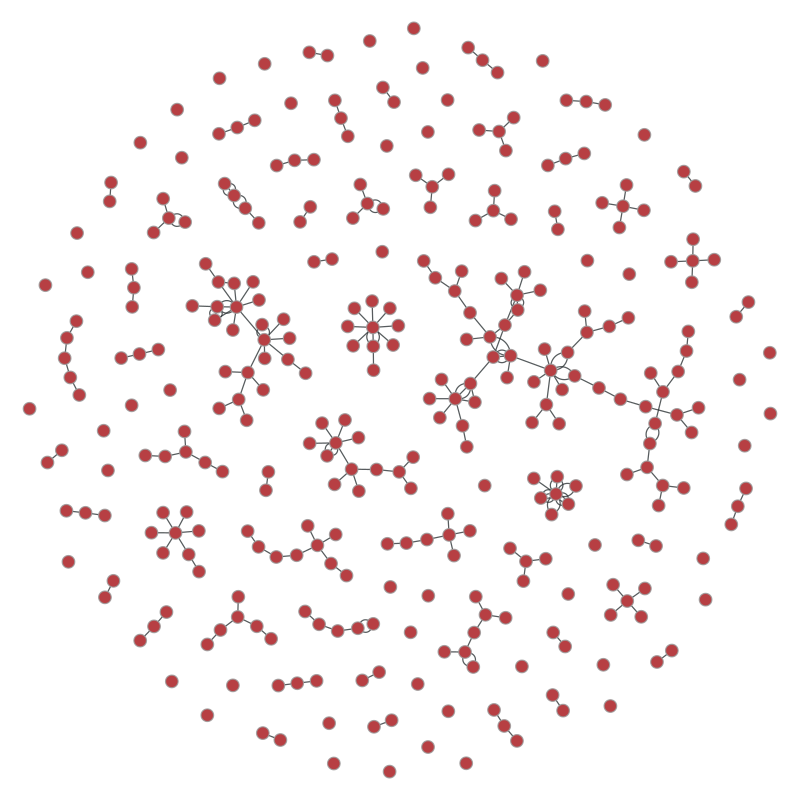

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb32698d668, at 0x7fb3269ff828>

In [354]:
# Desenhando o grafo
graph_draw(g_a, output_size=(800,800))

In [342]:
largest = topology.label_largest_component(g_a)

In [343]:
pd.Series(largest)

0      0
1      0
2      0
3      0
4      0
      ..
325    0
326    0
327    0
328    0
329    0
Length: 330, dtype: int64

In [344]:
comp, hist = pd.Series(topology.label_components(g))

In [345]:
pd.Series(comp)

0        0
1        1
2        2
3        3
4        4
      ... 
325     12
326     16
327    105
328     10
329     44
Length: 330, dtype: int64

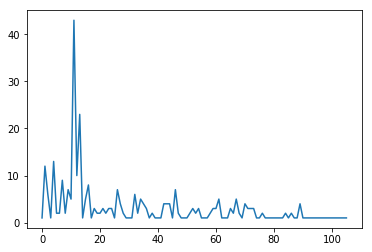

In [346]:
plt.plot(hist)

In [347]:
g_a.set_vertex_filter(largest)

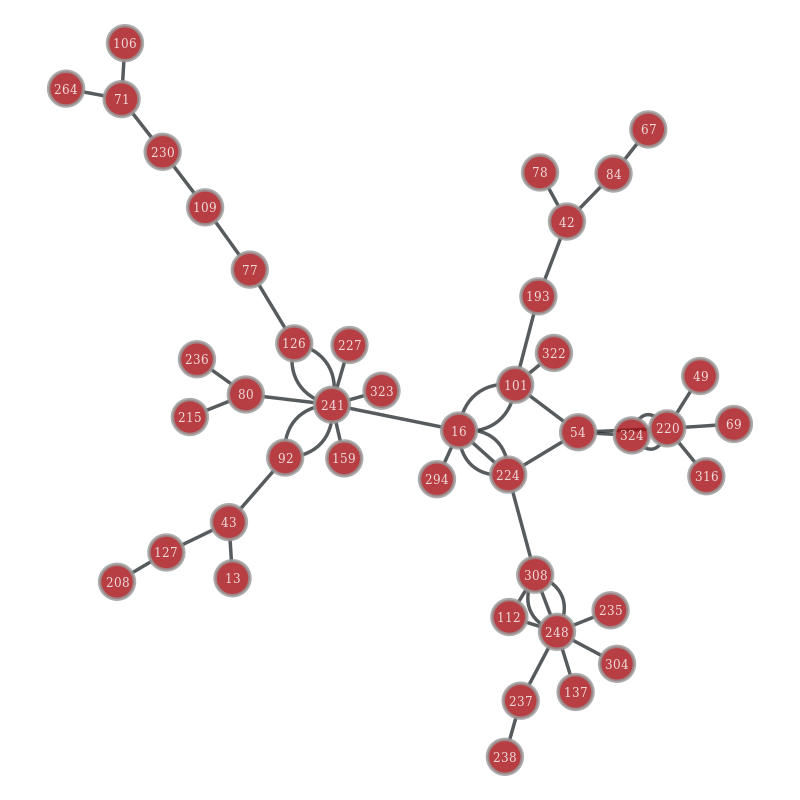

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb326a3f9b0, at 0x7fb33c324c18>

In [348]:
graph_draw(g_a, output_size=(800,800),vertex_text=g_a.vertex_index)

In [349]:
autoresid

{'Abib, Gustavo': 1,
 'Afonso, Jose Roberto': 2,
 'Aggio, Gustavo De Oliveira': 3,
 'Albuquerque, Eduardo Da Motta E': 4,
 'Albuquerque, Marconi Edson Esmeraldo': 5,
 'Alcadipani, Rafael': 6,
 'Alcantara, Daniela P. R. De': 7,
 'Alcantara, Wenersamy Ramos De': 8,
 'Alderete, Veronica': 9,
 'Alexandre, Michel': 10,
 'Almeida, Carlos Alano Soares De': 11,
 'Alves, Andre Cherubini': 12,
 'Alves, Elia Elisa Cia': 13,
 'Amitrano, Claudio Roberto': 14,
 'Andrade, Daniel Caixeta': 15,
 'Andrade, Rogerio P. De': 16,
 'Andrade, Rogerio Pereira De': 16,
 'Andrietta, Lucas Salvador': 18,
 'Anunciacao, Pedro': 19,
 'Arantes, Flavio': 20,
 'Arruda, Jose Jobson De Andrade': 21,
 'Assaf Neto, Alexandre': 22,
 'Assis, Renato Linhares De': 23,
 'Augusto De Souza, Paulo Ramalho': 24,
 'Bacic, Miguel': 25,
 'Baioco, Gisele Busichia': 26,
 'Balestrin, Alsones': 27,
 'Ballini, Rosangela': 28,
 'Balsadi, Otavio Valentim': 29,
 'Baltar, Paulo Eduardo': 30,
 'Barbieux, Denise': 31,
 'Barone, Ricardo Strazzaca

# Elaborando o grafo do IE-URFJ

In [296]:
# Determinando o número de vértices
nvertices = list(autoresrjid.values())
nvertices = np.unique(nvertices)
nvertices = list(nvertices)
len(nvertices)

605

In [297]:
# Criando o grafo
N = len(nvertices)
g_a = Graph(directed=False)
g_a.add_vertex(N)

# Adicionando os edges
g_a.add_edge_list(edgesrj1)
g_a.add_edge_list(edgesrj2)
g_a.add_edge_list(edgesrj3)
g_a.add_edge_list(edgesrj4)
g_a.add_edge_list(edgesrj5)
g_a.add_edge_list(edgesrj6)
g_a.add_edge_list(edgesrj7)
g_a.add_edge_list(edgesrj8)

    
g_a

<Graph object, undirected, with 656 vertices and 507 edges at 0x7fb326adc160>

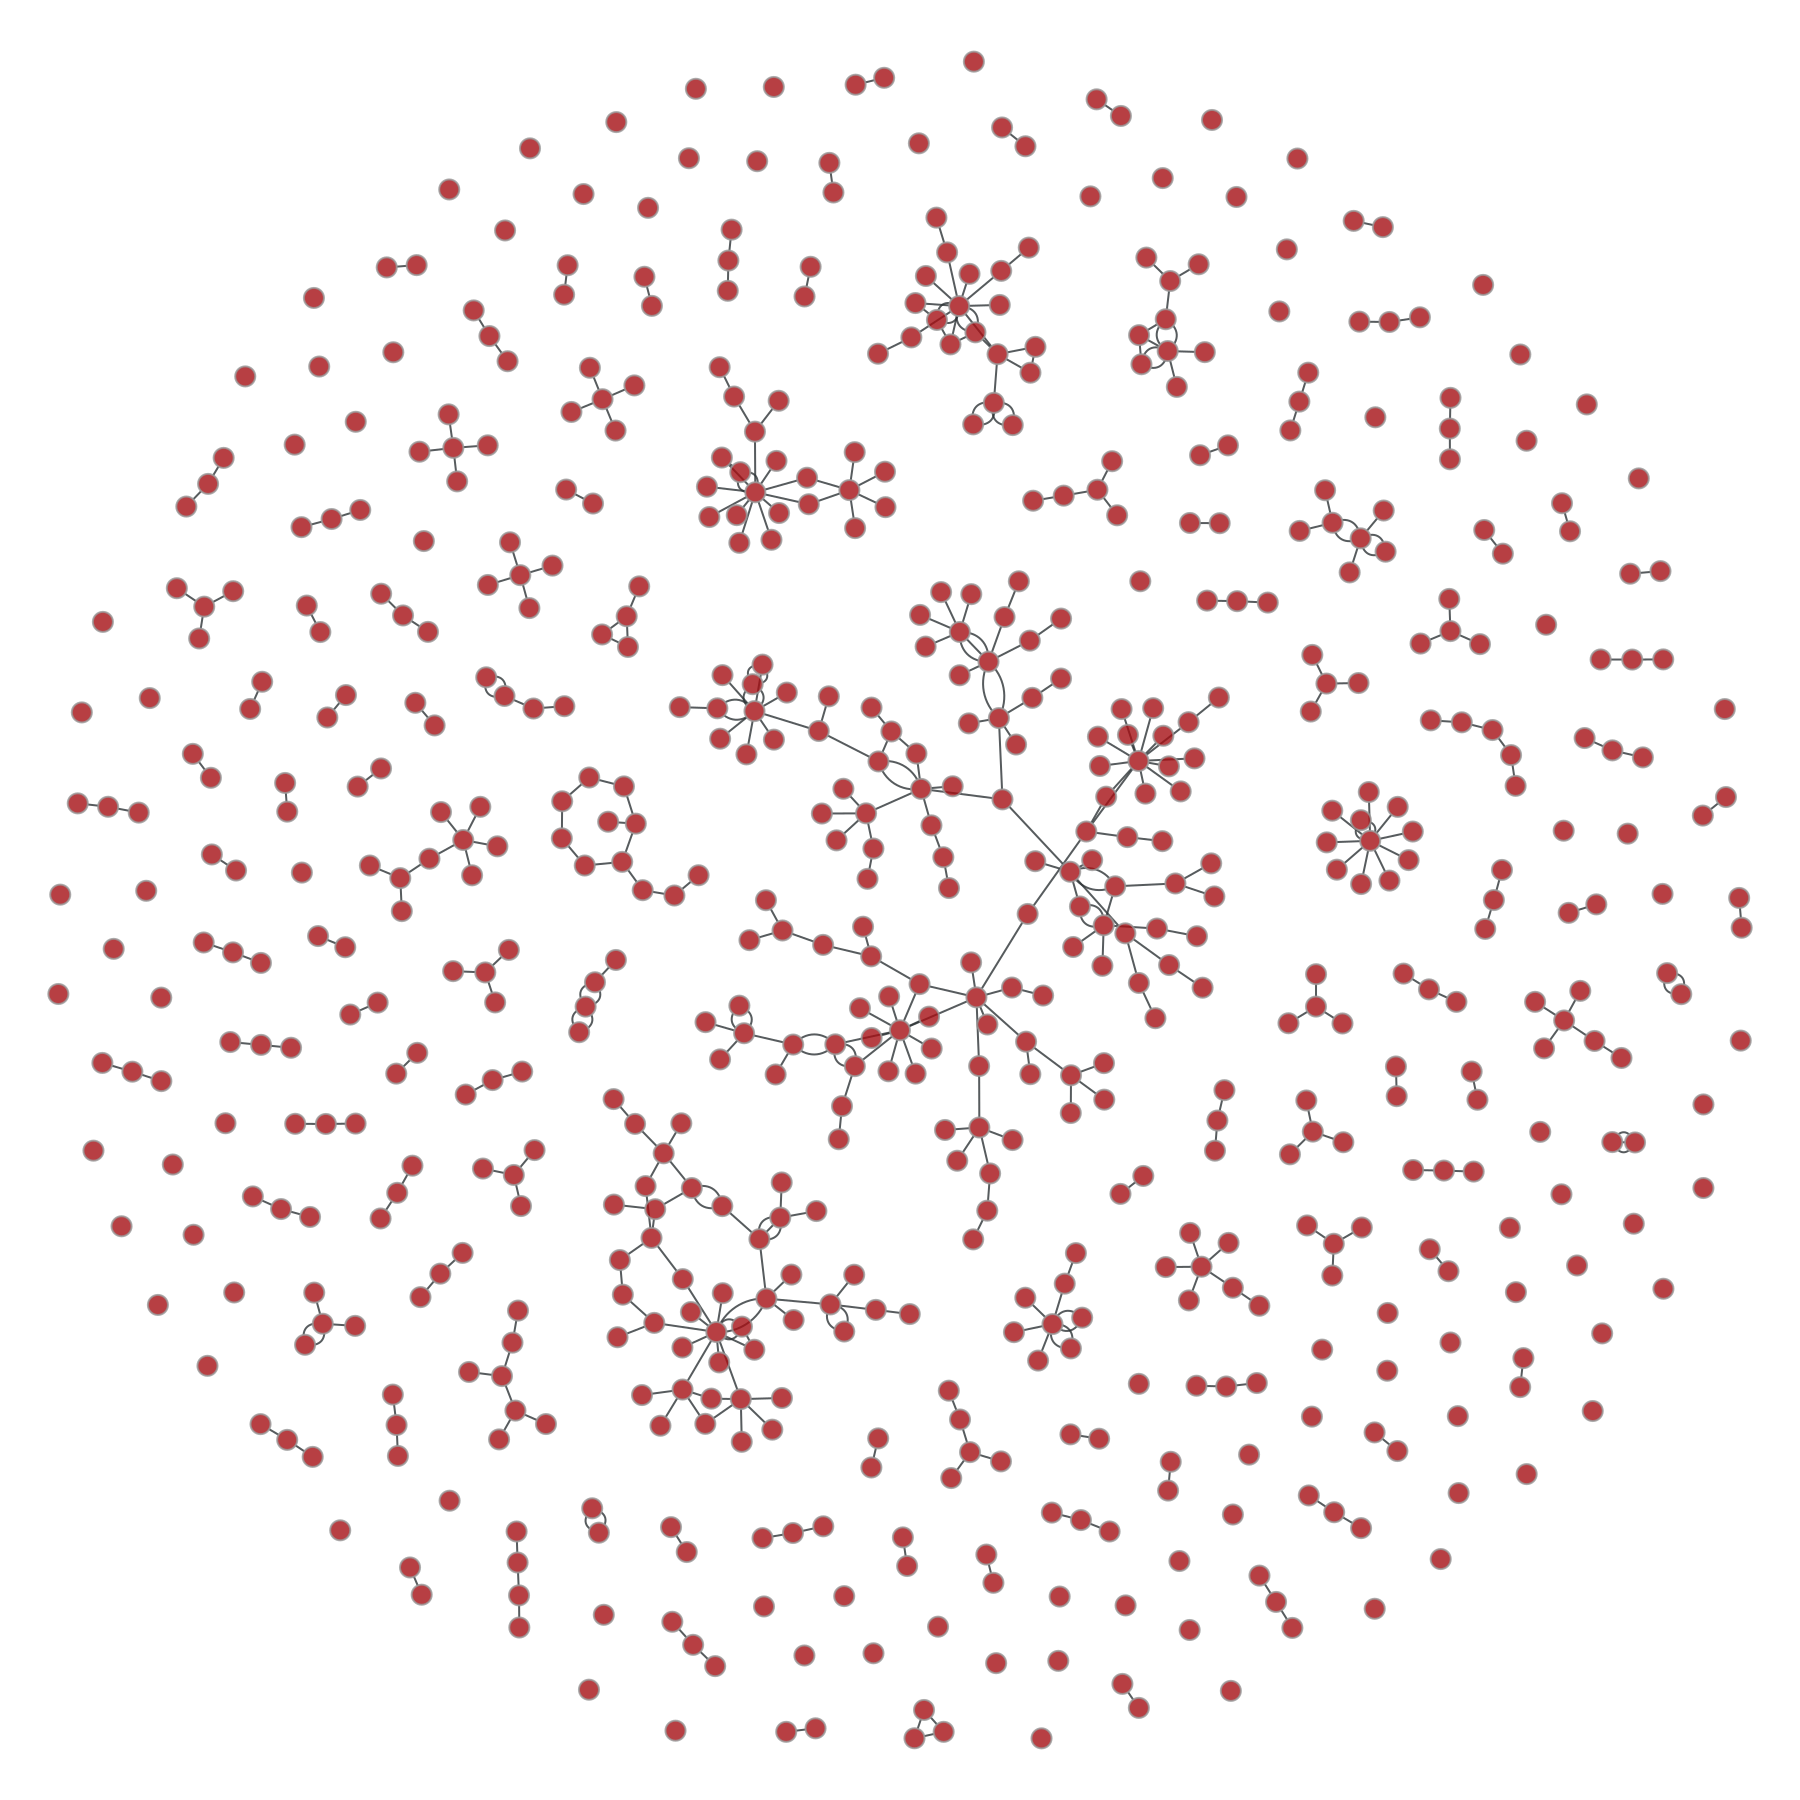

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb326adc160, at 0x7fb326adc6a0>

In [298]:
# Desenhando o grafo
graph_draw(g_a, output_size=(1800,1800))

In [299]:
largest = topology.label_largest_component(g_a)

In [300]:
pd.Series(largest)

0      0
1      1
2      0
3      0
4      0
      ..
651    0
652    0
653    0
654    0
655    0
Length: 656, dtype: int64

In [301]:
comp, hist = pd.Series(topology.label_components(g))

In [302]:
pd.Series(comp)

0        0
1        1
2        2
3        3
4        4
      ... 
325     12
326     16
327    105
328     10
329     44
Length: 330, dtype: int64

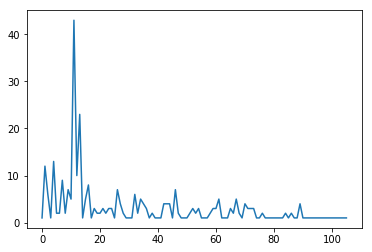

In [303]:
plt.plot(hist)

In [304]:
g_a.set_vertex_filter(largest)

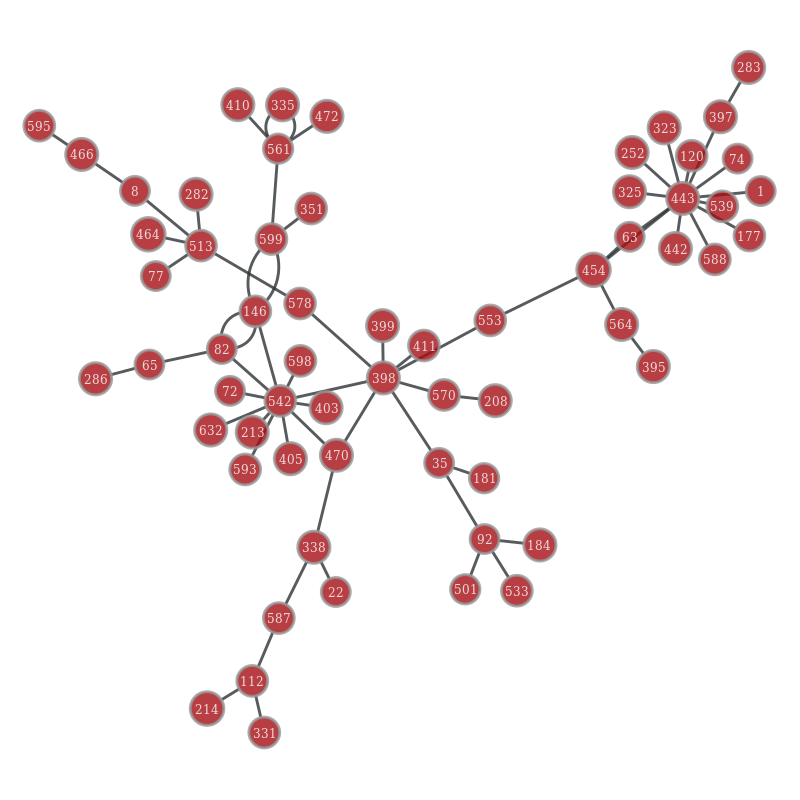

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb326adc160, at 0x7fb326ade550>

In [305]:
graph_draw(g_a, output_size=(800,800),vertex_text=g_a.vertex_index)

In [306]:
autoresrjid

{'Abramo, Laura Diaz': 1,
 'Abramo, Pedro': 2,
 'Abreu, Ana Lucia De': 3,
 'Abreu, Monica Cavalcanti Sa De': 4,
 'Addor, Felipe': 5,
 'Afonso, Luis Eduardo': 6,
 'Agostinho, Marcia Cristina Esteves': 7,
 'Aguas, Marina Ferreira Fortes': 8,
 'Akerman, Marco': 9,
 'Albuquerque, Paulette Cavalcanti De': 10,
 'Alencar, Fabio Lima': 11,
 'Almeida, Edmar Luis Fagundes De': 12,
 'Almeida, Jose Elias Feres De': 13,
 'Almeida, Lauro Brito De': 14,
 'Almeida, Luciene Nascimento De': 15,
 'Almeida, Victor': 16,
 'Almeida, Victor Manoel Cunha De': 16,
 'Almeida, Vinicio De Souza E': 18,
 'Altaf, Joyce Goncalves': 19,
 'Alves, Flavia Chaves': 20,
 'Alves, Francisco Jose Dos Santos': 21,
 'Alves, Joana': 22,
 'Alves, Luciana Albuquerque': 23,
 'Amancio, Robson': 24,
 'Amorim, Joao Guilherme Barbosa De': 25,
 'Andreassi, Tales': 26,
 'Andreazzi, Maira De Fatima Siliansky De': 27,
 'Andreazzi, Maria De Fatima Siliansky De': 27,
 'Andrietta, Lucas Salvador': 29,
 'Antunes Junior, Jose Antonio Valle': 3

# Elaborando um grafo conjunto

In [ ]:
# Número de autores dos dados do IE-Unicamp
len(autores)

In [ ]:
autores

In [ ]:
autoresrj

In [355]:
set(autores).intersection(autoresrj)

{'Andrietta, Lucas Salvador',
 'Ballini, Rosangela',
 'Bo, Inacio Guerberoff Lanari',
 'Braga, Iale Falleiros',
 'Cardoso, Artur Monte',
 'Carvalho, Laura',
 'Cintra, Marcos Antonio Macedo',
 'Costa, Fernando Nogueira Da',
 'Lelis, Marcos Tadeu Caputi',
 'Lima, Gilberto Tadeu',
 'Maciel, Leandro Dos Santos',
 'Mattos, Leonardo Vidal',
 'Oreiro, Jose Luis',
 'Paula, Luiz Fernando De',
 'Santos, Claudio Hamilton Matos Dos',
 'Sestelo, Jose Antonio De Freitas',
 'Tauile, Jose Ricardo',
 'Torres Filho, Ernani Teixeira'}